In [1]:
%load_ext autoreload
%autoreload 2

In [23]:
from tqdm.autonotebook import tqdm
import numpy as np
import matplotlib.pyplot as plt

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [2]:
from childes_mi.utils.paths import DATA_DIR, ensure_dir, BREAKFAST_DIR
import urllib.request

In [3]:
BREAKFAST_DIR

PosixPath('/mnt/cube/tsainbur/Projects/github_repos/childes_mi_project/data/raw/BREAKFAST_Data_Dir')

In [8]:
breakfast_files = list(BREAKFAST_DIR.glob('segmentation_fine/*/*.txt'))

In [125]:
len(breakfast_files)

1285

In [9]:
breakfast_files[0]

PosixPath('/mnt/cube/tsainbur/Projects/github_repos/childes_mi_project/data/raw/BREAKFAST_Data_Dir/segmentation_fine/milk/P35_stereo01_P35_milk.txt')

In [11]:
import pandas as pd

In [24]:
behaviors = [pd.read_csv(i, delimiter=' ', header=None)[1].values for i in tqdm(breakfast_files)]

In [83]:
np.unique(np.concatenate(behaviors))[:20]

array(['carry_bag', 'carry_bowl', 'carry_bread', 'carry_butter',
       'carry_capMilk', 'carry_capSalt', 'carry_capSugar', 'carry_cereal',
       'carry_chocolatepowder', 'carry_cloth', 'carry_coffee',
       'carry_cup', 'carry_cuttingboard', 'carry_egg', 'carry_eggcarton',
       'carry_flour', 'carry_fork', 'carry_fruit', 'carry_handle',
       'carry_juicer'], dtype=object)

In [84]:
behaviors_simplified = [[element.split('_')[0] for element in seq] for seq in behaviors]

In [85]:
np.unique(np.concatenate(behaviors_simplified))

array(['carry', 'close', 'cook', 'crack', 'cut', 'flip', 'fry', 'garbage',
       'grind', 'hold', 'liftopen', 'melt', 'move', 'open', 'openClose',
       'peel', 'pickup', 'pour', 'pressclose', 'pull', 'push', 'reach',
       'scoop', 'scramble', 'screwclose', 'screwopen', 'shift', 'smear',
       'squeeze', 'stir', 'transfer', 'turn', 'turnonOff', 'twistonOff',
       'wait', 'walk', 'wash', 'wipe'], dtype='<U10')

In [86]:
behav_lens = [len(i) for i in behaviors]

In [87]:
np.sum(behav_lens)

53575

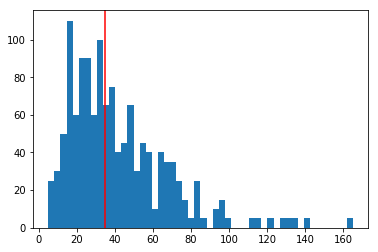

In [88]:
fig, ax = plt.subplots()
ax.hist(behav_lens, bins = 50);
ax.axvline(np.median(behav_lens), color='red')

### MI

In [32]:
from childes_mi.information_theory import mutual_information as mi

In [33]:
distances = np.arange(1,100)

In [108]:
behaviors_simplified[0][:5]

['garbage', 'turn', 'reach', 'carry', 'reach']

In [110]:
len(behaviors_simplified)

1285

In [126]:
behaviors_indv = [["{}_{}".format(bi, element) for element in bout] for bi, bout in enumerate(tqdm(behaviors))]

In [135]:
behaviors_indv[0]

['0_garbage',
 '0_turn',
 '0_reach_cup',
 '0_carry_cup',
 '0_reach_fridge',
 '0_open_fridge',
 '0_reach_milk',
 '0_carry_milk',
 '0_close_fridge',
 '0_move',
 '0_carry_milk',
 '0_pull_drawer',
 '0_reach_spoon',
 '0_carry_spoon',
 '0_push_drawer',
 '0_reach_chocolatepowder',
 '0_carry_chocolatepowder',
 '0_reach_chocolatepowder',
 '0_carry_chocolatepowder',
 '0_liftopen_lidChoco',
 '0_move',
 '0_carry_spoon',
 '0_scoop_chocolatepowder',
 '0_reach_lidChoco',
 '0_carry_lidChoco',
 '0_pressclose_lidChoco',
 '0_carry_chocolatepowder',
 '0_reach_milk',
 '0_move',
 '0_reach_milk',
 '0_screwopen_capMilk',
 '0_carry_capMilk',
 '0_pour_milk',
 '0_reach_milk',
 '0_screwclose_capMilk',
 '0_move',
 '0_reach_cup',
 '0_stir_chocolate',
 '0_turn',
 '0_walk',
 '0_garbage']

In [136]:
(MI, MI_var), (shuff_MI, shuff_MI_var) = mi.sequential_mutual_information(
    behaviors, distances=distances, n_jobs=-1, estimate=True
)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.1s


[Parallel(n_jobs=-1)]: Done  72 out of  99 | elapsed:    1.8s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  92 out of  99 | elapsed:    1.9s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:    2.0s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    4.5s


[Parallel(n_jobs=-1)]: Done  72 out of  99 | elapsed:    5.5s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done  92 out of  99 | elapsed:    5.5s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:    5.5s finished


In [137]:
MI_DF = pd.DataFrame(
    [[MI, MI_var, shuff_MI, shuff_MI_var, distances]],
    columns=["MI", "MI_var", "shuff_MI", "shuff_MI_var", "distances"],
)

In [138]:
row = MI_DF.iloc[0]

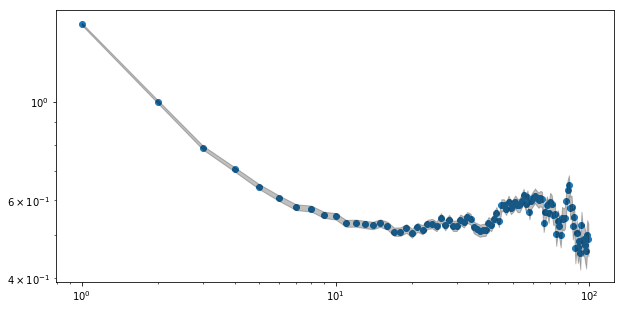

In [139]:
fig, ax = plt.subplots(figsize=(10,5))
MI = row.MI-row.shuff_MI
MI_var = row.MI_var

ax.scatter(distances, MI)
ax.fill_between(distances, MI-MI_var, MI+MI_var, alpha = 0.25, color= 'k')
#ax.set_ylim([1e-3, 1])
ax.set_yscale('log')
ax.set_xscale('log')

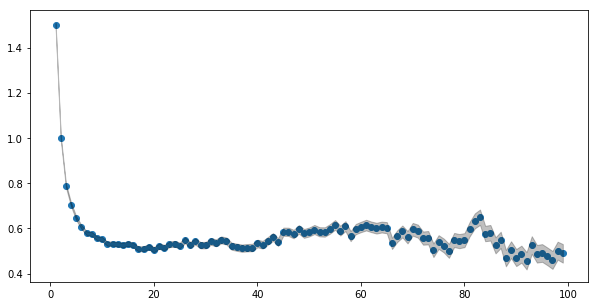

In [140]:
fig, ax = plt.subplots(figsize=(10,5))
MI = row.MI-row.shuff_MI
MI_var = row.MI_var

ax.scatter(distances, MI)
ax.fill_between(distances, MI-MI_var, MI+MI_var, alpha = 0.25, color= 'k')
#ax.set_ylim([1e-3, 1])


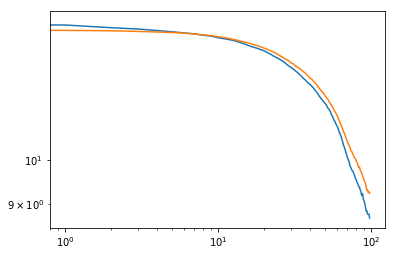

In [132]:
plt.loglog(row.MI)
plt.loglog(row.shuff_MI)

In [ ]:
### Single example

In [101]:
seq = behaviors_simplified[np.argmax(behav_lens)]

In [102]:
(MI, MI_var), (shuff_MI, shuff_MI_var) = mi.sequential_mutual_information(
    [seq], distances=distances, n_jobs=-1, estimate=True
)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s


[Parallel(n_jobs=-1)]: Done  72 out of  99 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  92 out of  99 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:    0.4s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s


[Parallel(n_jobs=-1)]: Done  72 out of  99 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  92 out of  99 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:    0.4s finished


In [103]:
MI_DF = pd.DataFrame(
    [[MI, MI_var, shuff_MI, shuff_MI_var, distances]],
    columns=["MI", "MI_var", "shuff_MI", "shuff_MI_var", "distances"],
)

In [104]:
row = MI_DF.iloc[0]

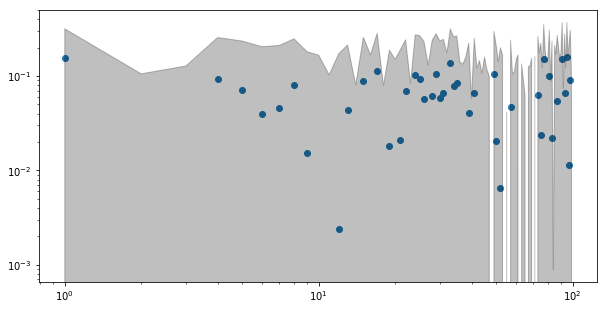

In [105]:
fig, ax = plt.subplots(figsize=(10,5))
MI = row.MI-row.shuff_MI
MI_var = row.MI_var

ax.scatter(distances, MI)
ax.fill_between(distances, MI-MI_var, MI+MI_var, alpha = 0.25, color= 'k')
#ax.set_ylim([1e-3, 1])
ax.set_yscale('log')
ax.set_xscale('log')

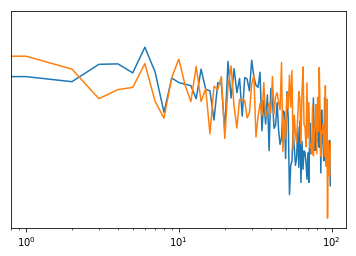

In [106]:
plt.loglog(row.MI)
plt.loglog(row.shuff_MI)